## Import Libs

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Phase 1: Data Preparation & Cleaning
- ✅ 1. Load the Data
- ✅ 2. Clean the Data
- ✅ 3. Feature Engineering

### ✅ 1. Load the Data

In [2]:
df = pd.read_csv("../data/sales dataset.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### ✅ 2. Clean the Data

In [7]:
# Drop null values
df.dropna(axis=0,inplace=True)
df.drop("Row ID",axis=1,inplace=True)

In [8]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [11]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9784,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9785,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9786,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format="mixed")
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format="mixed")

### ✅ 3. Feature Engineering

In [13]:
idx = df[df['Order Date']>df['Ship Date']].index.tolist()
df.drop(idx,axis=0,inplace=True)

In [14]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064
9780,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772
9781,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832
9782,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240


#### 1. Shipping Duration

In [15]:
df["ShippingDuration"] =  (df['Ship Date'] - df['Order Date']).dt.days

In [16]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4


In [17]:
idx = df[df['Order Date']>df['Ship Date']].index.tolist()
df.drop(idx,axis=0,inplace=True)

In [18]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064,2
9780,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772,2
9781,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832,2
9782,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240,2


#### 2. Time-Based Features

In [19]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['day_of_week'] = df['Order Date'].dt.dayofweek
df['is_weekend'] = (df['day_of_week']>= 5).astype(int)
df['Quarter'] = round(df["month"]/3)

In [20]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92,2017,8,4,0,3.0
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92,2017,8,4,0,3.0
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,15.552,5,2018,4,6,1,1.0
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153,2017,5,4,0,2.0
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4,2016,11,1,0,4.0


In [21]:
df.is_weekend.value_counts()

is_weekend
0    5470
1    2634
Name: count, dtype: int64

In [22]:
df['Quarter'] = df['Quarter'].apply(lambda x: round(x))
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92,2017,8,4,0,3
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92,2017,8,4,0,3
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,15.552,5,2018,4,6,1,1
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153,2017,5,4,0,2
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4,2016,11,1,0,4


#### 3. Aggregation For Forecasting

In [23]:
ds = (df.groupby("Order ID").agg(
    {
        'Order Date':lambda x: x.mode().iloc[0],
        'year':lambda x: x.mode().iloc[0],
        'month':lambda x: x.mode().iloc[0],
        'day_of_week':lambda x: x.mode().iloc[0],
        'is_weekend':lambda x: x.mode().iloc[0],
        'Quarter':lambda x: x.mode().iloc[0],
        'ShippingDuration':'mean',
        'Ship Mode':lambda x: x.mode().iloc[0],
        'Segment':lambda x: x.mode().iloc[0],
        'State':lambda x: x.mode().iloc[0],
        'Region':lambda x: x.mode().iloc[0],
        'Product ID':'nunique',
        'Sales':'sum',
        
    }
)).rename(columns={
    'Product ID':'Num Products',
})

#### 4. Lag Features (MOST IMPORTANT)

In [24]:
ds = ds.sort_values('Order Date')

ds['sales_lag_1'] = ds['Sales'].shift(1)
ds['sales_lag_7'] = ds['Sales'].shift(7)
ds['sales_lag_30'] = ds['Sales'].shift(30)

#### 5. Rolling Statistics

In [25]:
ds['rolling_mean_7'] = ds['Sales'].shift(1).rolling(7).mean()
ds['rolling_mean_30'] = ds['Sales'].shift(1).rolling(30).mean()
ds['rolling_std_30'] = ds['Sales'].shift(1).rolling(30).std()

In [26]:
ds

,Order Date,year,month,day_of_week,is_weekend,Quarter,ShippingDuration,Ship Mode,Segment,State,Region,Num Products,Sales,sales_lag_1,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_mean_30,rolling_std_30
Order ID,,,,,,,,,,,,,,,,,,,
CA-2015-140795,2015-01-02,2015,1,4,0,0,59.0,First Class,Consumer,Wisconsin,Central,1,468.900,NaN,NaN,NaN,NaN,NaN,NaN
US-2015-143707,2015-01-03,2015,1,5,1,0,120.0,Standard Class,Home Office,New York,East,1,5.940,468.900,NaN,NaN,NaN,NaN,NaN
CA-2015-104269,2015-01-03,2015,1,5,1,0,151.0,Second Class,Consumer,Washington,West,1,457.568,5.940,NaN,NaN,NaN,NaN,NaN
CA-2015-168312,2015-01-03,2015,1,5,1,0,181.0,Standard Class,Consumer,Texas,Central,2,513.861,457.568,NaN,NaN,NaN,NaN,NaN
CA-2015-131009,2015-01-03,2015,1,5,1,0,120.0,Standard Class,Consumer,Texas,Central,4,574.194,513.861,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2018-146626,2018-12-29,2018,12,5,1,4,123.0,Standard Class,Corporate,California,West,1,101.120,6.030,122.530,141.000,523.254857,272.097393,382.586677
CA-2018-126221,2018-12-30,2018,12,6,1,4,122.0,Standard Class,Home Office,Indiana,Central,1,209.300,101.120,725.840,191.984,520.196286,270.768060,383.126796
CA-2018-115427,2018-12-30,2018,12,6,1,4,61.0,Standard Class,Corporate,California,West,2,34.624,209.300,695.944,31.800,446.404857,271.345260,383.017039


In [27]:
model_df = ds.dropna().reset_index(drop=True)

model_df

,Order Date,year,month,day_of_week,is_weekend,Quarter,ShippingDuration,Ship Mode,Segment,State,Region,Num Products,Sales,sales_lag_1,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_mean_30,rolling_std_30
0,2015-01-12,2015,1,0,0,0,59.0,Second Class,Consumer,Ohio,East,4,1614.124,95.968,75.160,468.900,441.349714,467.258033,755.627982
1,2015-01-12,2015,1,0,0,0,59.0,First Class,Consumer,Wisconsin,Central,2,2854.480,1614.124,15.696,5.940,661.201714,505.432167,784.105392
2,2015-01-12,2015,1,0,0,0,59.0,First Class,Consumer,Massachusetts,East,3,327.560,2854.480,65.800,457.568,1066.742286,600.383500,887.224990
3,2015-01-12,2015,1,0,0,0,120.0,Standard Class,Consumer,California,West,1,58.200,327.560,76.120,513.861,1104.136571,596.049900,888.263519
4,2015-01-12,2015,1,0,0,0,59.0,Second Class,Corporate,Texas,Central,1,674.058,58.200,2027.144,574.194,1101.576571,580.861200,893.597088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,2018-12-29,2018,12,5,1,4,123.0,Standard Class,Corporate,California,West,1,101.120,6.030,122.530,141.000,523.254857,272.097393,382.586677
4006,2018-12-30,2018,12,6,1,4,122.0,Standard Class,Home Office,Indiana,Central,1,209.300,101.120,725.840,191.984,520.196286,270.768060,383.126796
4007,2018-12-30,2018,12,6,1,4,61.0,Standard Class,Corporate,California,West,2,34.624,209.300,695.944,31.800,446.404857,271.345260,383.017039
4008,2018-12-30,2018,12,6,1,4,61.0,Standard Class,Consumer,New York,East,3,466.842,34.624,88.060,819.280,351.930571,271.439393,382.956479


In [28]:
model_df.to_csv("../data/model_df.csv",index=False)

**✅ Phase 1 Complete: Data cleaning and feature engineering are now finished. The dataset is fully prepared and ready for analysis.**
**Next Step — Phase 2: Let’s move on to the analysis and insight generation stage.**

## Phase 2: Exploratory Data Analysis (EDA) & Visualization
- ✅ 4. General Overview
- ✅ 5. IQR outlier detection
- ✅ 6. ADF test

### ✅ 4. General Overview

#### 1. Descriptive Stat

In [29]:
ds.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,4040,2017-04-09 23:10:48.712871168,2015-01-02 00:00:00,2016-04-25 00:00:00,2017-05-27 00:00:00,2018-04-06 00:00:00,2018-12-30 00:00:00,NaN
year,4040.0,2016.745792,2015.0,2016.0,2017.0,2018.0,2018.0,1.117943
month,4040.0,6.85099,1.0,4.0,7.0,10.0,12.0,3.454737
day_of_week,4040.0,2.956436,0.0,1.0,3.0,5.0,6.0,2.123818
is_weekend,4040.0,0.324257,0.0,0.0,0.0,1.0,1.0,0.468155
Quarter,4040.0,2.295792,0.0,1.0,2.0,3.0,4.0,1.22404
ShippingDuration,4040.0,41.966337,0.0,4.0,5.0,89.0,214.0,58.41695
Num Products,4040.0,2.004208,1.0,1.0,1.0,3.0,14.0,1.427537
Sales,4040.0,469.69274,0.556,36.762,151.456,504.0305,23661.228,1014.899612
sales_lag_1,4039.0,469.80828,0.556,36.921,151.72,504.189,23661.228,1014.998698


#### 2. Balance check

In [30]:
ds[['year']].value_counts()

year
2018    1363
2017    1065
2016     834
2015     778
Name: count, dtype: int64

In [31]:
ds['month'].value_counts()

month
11    431
9     420
12    408
3     380
5     342
4     324
7     317
8     313
6     303
10    280
1     270
2     252
Name: count, dtype: int64

In [32]:
ds['Quarter'].value_counts()

Quarter
3    1013
2     962
1     956
4     839
0     270
Name: count, dtype: int64

In [33]:
ds['is_weekend'].value_counts()

is_weekend
0    2730
1    1310
Name: count, dtype: int64

#### 3. Trends Analysis

In [34]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y = ds['Sales'],
        x = ds['Order Date'],
        mode='lines',
        name='Daily Sales'
    )
)

fig.update_layout(
    title='Daily Sales Trend by Order Date',
    xaxis_title='Order Date',
    yaxis_title='Sales',
    hovermode='x unified'
)

fig.show()

### ✅ 5. IQR outlier detection

In [35]:
Q1 = ds['Sales'].quantile(0.25)
Q3 = ds['Sales'].quantile(0.75)
IQR = Q3-Q1

outliers = ds[(ds['Sales'] < Q1 - 1.5*IQR) | (ds['Sales'] > Q3 + 1.5*IQR)]
outliers

,Order Date,year,month,day_of_week,is_weekend,Quarter,ShippingDuration,Ship Mode,Segment,State,Region,Num Products,Sales,sales_lag_1,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_mean_30,rolling_std_30
Order ID,,,,,,,,,,,,,,,,,,,
CA-2015-131926,2015-01-06,2015,1,1,0,0,151.0,Second Class,Home Office,Minnesota,Central,5,3745.630,904.130,574.194,NaN,398.365714,NaN,NaN
CA-2015-134313,2015-01-11,2015,1,6,1,0,181.0,Standard Class,Consumer,Colorado,West,2,2027.144,76.120,4.710,NaN,268.831714,NaN,NaN
CA-2015-150798,2015-01-12,2015,1,0,0,0,59.0,Second Class,Consumer,Ohio,East,4,1614.124,95.968,75.160,468.900,441.349714,467.258033,755.627982
CA-2015-120474,2015-01-12,2015,1,0,0,0,59.0,First Class,Consumer,Wisconsin,Central,2,2854.480,1614.124,15.696,5.940,661.201714,505.432167,784.105392
CA-2015-162775,2015-01-13,2015,1,1,0,0,2.0,Second Class,Corporate,Louisiana,South,5,1287.260,40.846,95.968,73.200,809.319429,563.831933,899.108991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2018-115602,2018-12-18,2018,12,1,0,4,6.0,Standard Class,Consumer,New York,East,4,2888.518,233.532,66.284,370.782,133.208286,276.931467,370.361078
CA-2018-158729,2018-12-19,2018,12,2,0,4,2.0,First Class,Consumer,Louisiana,South,1,1665.620,18.704,233.532,282.688,516.325571,338.162900,609.589170
CA-2018-120376,2018-12-22,2018,12,5,1,4,3.0,First Class,Consumer,Michigan,Central,4,2283.430,141.960,12.510,495.300,196.202857,316.166833,600.514715


In [36]:
outliers['Sales'].describe().T

count      388.000000
mean      2602.476104
std       2221.851256
min       1214.850000
25%       1454.325375
50%       1887.630000
75%       2814.495000
max      23661.228000
Name: Sales, dtype: float64

### ✅ 6. ADF test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
result = adfuller(ds['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -63.334067810483205
p-value: 0.0


In [39]:
ds

,Order Date,year,month,day_of_week,is_weekend,Quarter,ShippingDuration,Ship Mode,Segment,State,Region,Num Products,Sales,sales_lag_1,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_mean_30,rolling_std_30
Order ID,,,,,,,,,,,,,,,,,,,
CA-2015-140795,2015-01-02,2015,1,4,0,0,59.0,First Class,Consumer,Wisconsin,Central,1,468.900,NaN,NaN,NaN,NaN,NaN,NaN
US-2015-143707,2015-01-03,2015,1,5,1,0,120.0,Standard Class,Home Office,New York,East,1,5.940,468.900,NaN,NaN,NaN,NaN,NaN
CA-2015-104269,2015-01-03,2015,1,5,1,0,151.0,Second Class,Consumer,Washington,West,1,457.568,5.940,NaN,NaN,NaN,NaN,NaN
CA-2015-168312,2015-01-03,2015,1,5,1,0,181.0,Standard Class,Consumer,Texas,Central,2,513.861,457.568,NaN,NaN,NaN,NaN,NaN
CA-2015-131009,2015-01-03,2015,1,5,1,0,120.0,Standard Class,Consumer,Texas,Central,4,574.194,513.861,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2018-146626,2018-12-29,2018,12,5,1,4,123.0,Standard Class,Corporate,California,West,1,101.120,6.030,122.530,141.000,523.254857,272.097393,382.586677
CA-2018-126221,2018-12-30,2018,12,6,1,4,122.0,Standard Class,Home Office,Indiana,Central,1,209.300,101.120,725.840,191.984,520.196286,270.768060,383.126796
CA-2018-115427,2018-12-30,2018,12,6,1,4,61.0,Standard Class,Corporate,California,West,2,34.624,209.300,695.944,31.800,446.404857,271.345260,383.017039


**✅ Phase 2 Complete: General overview, IQR and ADF test are now finished.**
**Next Step — Phase 3: Let’s move on to preprocessing and modeling stage.**
## Phase 3: Preprocessing and Modeling
- ✅ 7. Search Loop
- ✅ 8. Best Model
- ✅ 9. Model Evaluation

### ✅ 7. Search Loop

In [40]:
# Machine learning models & tools
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_validate, train_test_split

# Time-Series Aware CV
from sklearn.model_selection import TimeSeriesSplit

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [41]:
x = model_df.drop(['Sales','year','Order Date'],axis=1)
y = model_df['Sales']

#### 1. Scalers

In [42]:
scalers = [
    ('NoScaler','passthrough'),
    ('StandarScaler',StandardScaler()),
    ('MinMaxScaler',MinMaxScaler()),
    ("RobustScaler",RobustScaler())
]

In [43]:
cat_cols = ['Ship Mode', 'Segment', 'State', 'Region']

encoder = ColumnTransformer(
    transformers=[
        (
            'cat',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=-1
            ),
            cat_cols
        )
    ],
    remainder='passthrough'
)

#### 2. Models

In [44]:
models = [
    ('Ridge', Ridge(alpha=1.0)),
    ('Lasso', Lasso(alpha=0.01)),
    ('RandomForest', RandomForestRegressor(n_estimators=300, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05)),
    ('ExtraTrees', ExtraTreesRegressor(n_estimators=400, random_state=42)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=200, learning_rate=0.05))
]

#### 3. For Loop

In [45]:
tscv = TimeSeriesSplit(n_splits=5)

In [46]:
results = []

for scaler in scalers:
    print(f"\nScaling with: {scaler[0]}")
    for model in models:
        print('_' * 60)
        print('Model:', model[0])

        steps = [
            ("Encoding",encoder),
            ("Scaling",scaler[1]),
            ('model', model[1])
        ]

        pipeline = Pipeline(steps)

        cv_results = cross_validate(
            pipeline,
            x,
            y,
            cv=tscv,
            scoring={
                'MAE': 'neg_mean_absolute_error',
                'RMSE': 'neg_root_mean_squared_error'
            },
            return_train_score=True,
            n_jobs=-1
        )

        train_rmse = -cv_results['train_RMSE'].mean()
        test_rmse = -cv_results['test_RMSE'].mean()
        test_mae = -cv_results['test_MAE'].mean()

        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE : {test_rmse:.2f}")
        print(f"Test MAE  : {test_mae:.2f}")

        results.append([
            scaler[0],
            model[0],
            train_rmse,
            test_rmse,
            test_mae
        ])

    print('_' * 60)


Scaling with: NoScaler
____________________________________________________________
Model: Ridge
Train RMSE: 1041.20
Test RMSE : 866.10
Test MAE  : 429.55
____________________________________________________________
Model: Lasso
Train RMSE: 1041.20
Test RMSE : 866.13
Test MAE  : 429.57
____________________________________________________________
Model: RandomForest
Train RMSE: 433.32
Test RMSE : 964.97
Test MAE  : 509.55
____________________________________________________________
Model: GradientBoosting
Train RMSE: 579.13
Test RMSE : 959.13
Test MAE  : 474.54
____________________________________________________________
Model: ExtraTrees
Train RMSE: 0.00
Test RMSE : 968.28
Test MAE  : 516.20
____________________________________________________________
Model: AdaBoost
Train RMSE: 881.97
Test RMSE : 993.76
Test MAE  : 640.58
____________________________________________________________

Scaling with: StandarScaler
____________________________________________________________
Model: Ridge


#### 1. Train and Test Split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

#### 2. Final Pipeline

In [48]:
steps = [
    ("Encoding",encoder),
    ("Scaling",MinMaxScaler()),
    ('model', Ridge())
]

pipeline = Pipeline(steps)

In [49]:
pipeline

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Ship Mode', 'Segment',
                                                   'State', 'Region'])])),
                ('Scaling', MinMaxScaler()), ('model', Ridge())])

#### 3. Training and prediction

In [50]:
r_model = pipeline.fit(x_train,y_train)

In [51]:
y_predict = r_model.predict(x_test)

### ✅ 9. Model Evaluation

In [52]:
print("ٌRidge:")
print("MSE:", mean_squared_error(y_test,y_predict))
print("R2:", r2_score(y_test, y_predict))
print("-"*40)

ٌRidge:
MSE: 1627032.624921167
R2: 0.09331934710436374
----------------------------------------


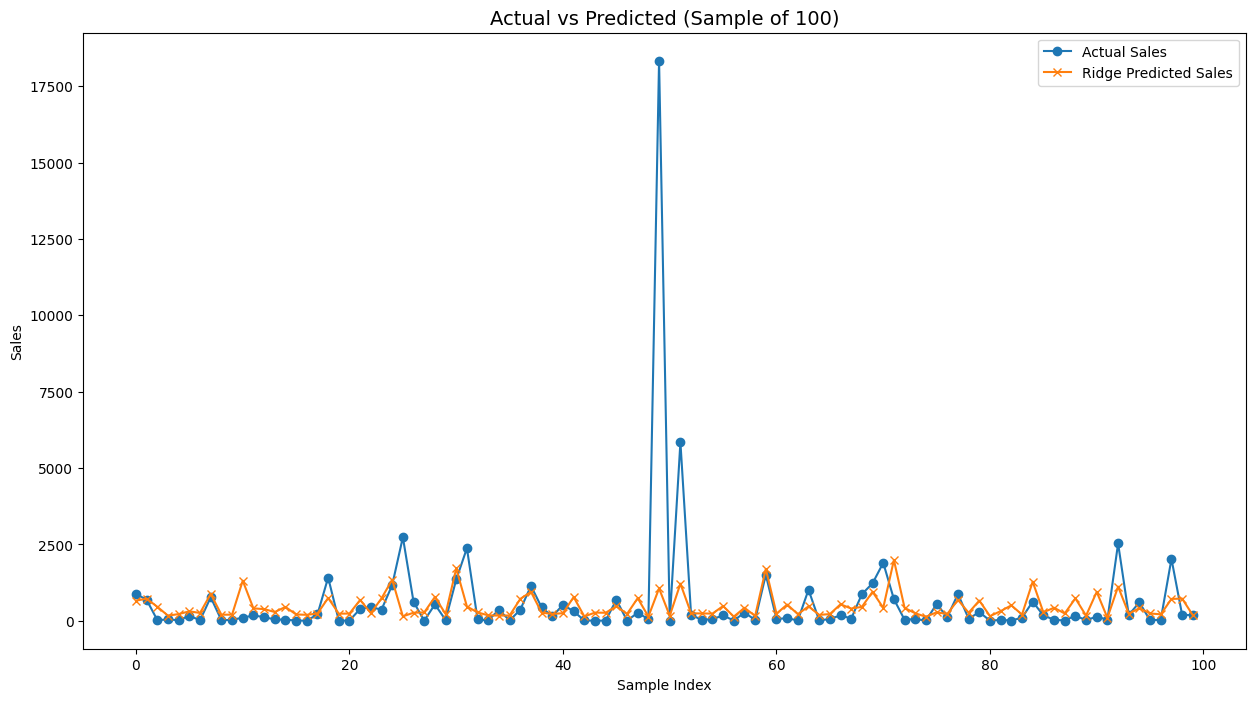

In [53]:
plt.figure(figsize=(15,8))

plt.plot(y_test.values[:100], label="Actual Sales", marker='o')  

# Plot predicted values
plt.plot(y_predict[:100], label="Ridge Predicted Sales", marker='x')  
 

plt.title("Actual vs Predicted (Sample of 100)", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.show()